### Load prediction data

In [1]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
import pandas as pd
predictions = pd.read_csv("./data/predictions.csv")
predictions.head()

,label,predGbt,predReg
0,0,0.016065,0.010550
1,0,0.017538,0.016826
2,0,0.010027,0.004773
3,0,0.011750,0.013833
4,0,0.017182,0.033627


### Roc construction

In [3]:
def rocPoints(classifier):
    positives = predictions[predictions.label == 1].shape[0]
    fprPoints = [0]
    tprPoints = [0]
    sortedGBT = predictions[classifier].sort_values(ascending = False)
    for p in sortedGBT:
        aboveThreshold = predictions[predictions[classifier] >= p].label
        tpr = aboveThreshold[aboveThreshold == 1].shape[0] / float(positives)
        fpr = aboveThreshold[aboveThreshold == 0].shape[0] / float(positives)
        fprPoints.append(fpr)
        tprPoints.append(tpr)
    return fprPoints, tprPoints

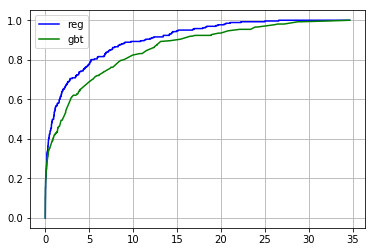

In [4]:
fpr_reg, tpr_reg =  rocPoints("predReg")
fpr_gbt, tpr_gbt =  rocPoints("predGbt")

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### Roc from library

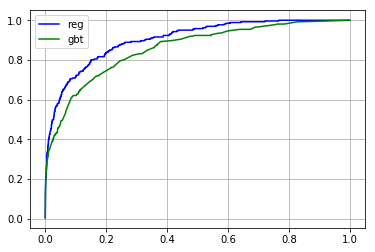

In [5]:
from sklearn.metrics import roc_curve
fpr_reg, tpr_reg, _ =  roc_curve(predictions["label"], predictions["predReg"])
fpr_gbt, tpr_gbt, _ =  roc_curve(predictions["label"], predictions["predGbt"])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()